In [39]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def loadData(dataDir, time = 500, scale = True):
    dataset = np.load(dataDir)
    labels = dataset['arr_0'][:, :, 1:-1] # ignore the first row of labels (all 0)
    properties = dataset['arr_1']
    if time >= 0:
        x = properties[:, :, time]
        #y = labels[:, :, time]
    else:
        x = np.reshape(properties, [properties.shape[0], properties.shape[1] * properties.shape[2]])
        #y = np.reshape(labels, [labels.shape[0], labels.shape[1] * labels.shape[2]])
    y = labels[:, :, -1]
    if scale == True:
        return np.transpose(scaleX(x)), np.transpose(y)
    else:
        return np.transpose(x), np.transpose(y)
def scaleX(x):
    return (x - np.mean(x, axis = 1, keepdims = True))/np.std(x, axis = 1, keepdims = True)


/Users/albertzhang/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


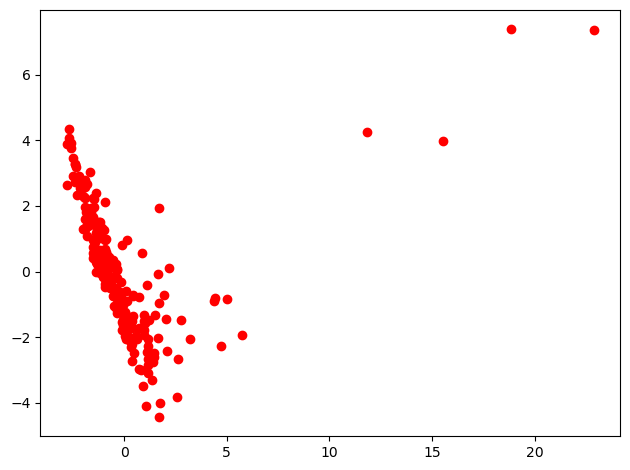

In [44]:
dataDir = '../data/dataset.npz'
x, y = loadData(dataDir, time = 50)
# set up kmeans
kmeans = KMeans(n_clusters=5, init='k-means++', algorithm='lloyd')
kmeans.fit(x)
# use PCA to reduce the dim to first 2 singular vector
pca = PCA(n_components=2)
pca.fit(x)
reducedX = pca.transform(x)
fig1,ax1 = plt.subplots(1,1, layout = 'tight')

# plot the data in the reduced dim
for i in range(0, reducedX.shape[0]):
    ax1.scatter(reducedX[i, 0], reducedX[i, 1], c = 'r')

